# **Demonstration for data processing and visualization in Python using EHT Data Processing Procedure**

In [ ]:
# import packages
import numpy as np
from math import pi, ceil # ceil is used to round numbers up to their nearest integer #
from matplotlib import pyplot as plt

# **Correlation**


In order to demonstrate the how the topics presented in class can be visualized in Python we will produce our own signals. Time, t, will be represented as an array and s1 and s2 will represent the "signals" generated by the two telescopes.

What do we have to change in the variable s2 to introduce a lag of $1.2345/2\Pi$ unit time?




In [ ]:
t  = np.linspace(0, 10_000, num=100_000)
s1 = np.sin(2 * pi * t)
s2 = np.sin(2 * pi * t-1.2345)

In order to visualize what these signals would look like, we want to plot the signals using plt.plot().



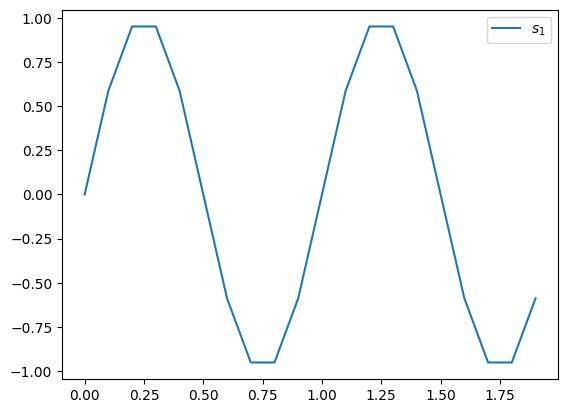

In [ ]:
plt.plot(t[:20], s1[:20], label=r'$s_1$')
plt.legend()
plt.show()

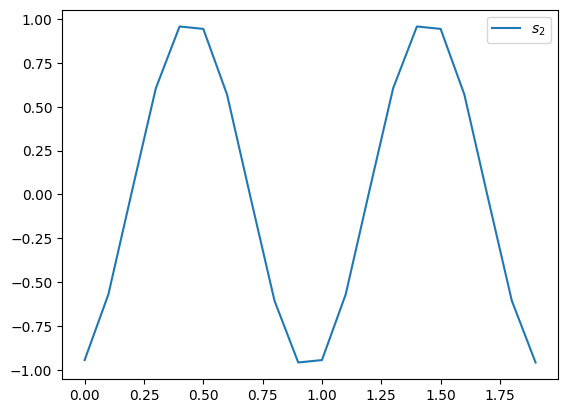

In [ ]:
plt.plot(t[:20], s2[:20], label=r'$s_2$')
plt.legend()
plt.show()

Delays bewteen signals are more easily identified in plots when the two signals are plotted together. What would need to change so that we can superimpose our plots?

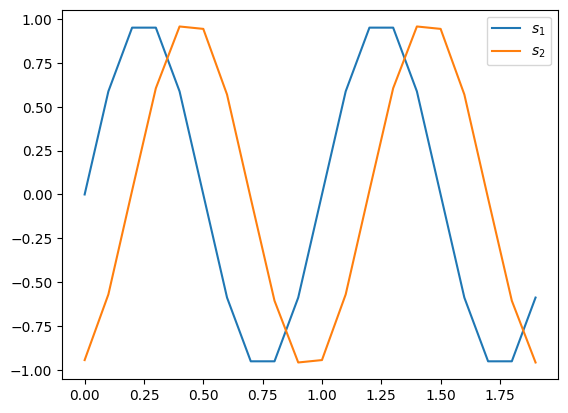

In [ ]:
plt.plot(t[:20], s1[:20], label=r'$s_1$')
plt.plot(t[:20], s2[:20], label=r'$s_2$')
plt.legend()
plt.show()

In order to show that cross correlation removes noise from data we will introduce noise with an SNR with no applied gain.

SNR = 0.9947129914286105
SNR = 1.0031977955969062


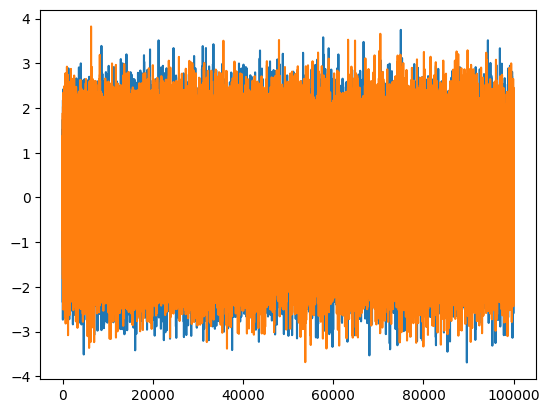

In [ ]:
n1 = np.random.normal(scale=np.sqrt(0.5), size=100_000)
n2 = np.random.normal(scale=np.sqrt(0.5), size=100_000)

print('SNR =', np.sum(s1*s1)/np.sum(n1*n1))
print('SNR =', np.sum(s2*s2)/np.sum(n2*n2))

plt.plot(s1 + n1)
plt.plot(s2 + n2)
plt.show()

# Visualization of the XF Correlator

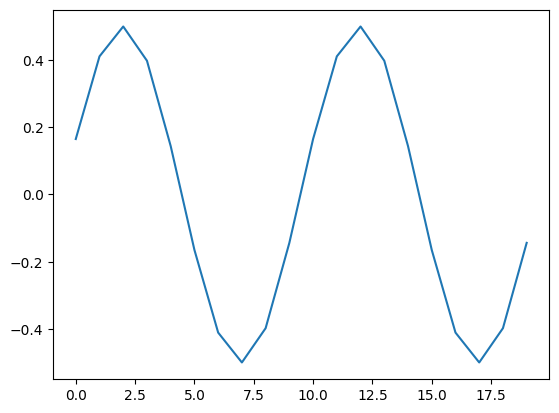

In [ ]:
tau = 1
X = np.array([np.mean(s1 * np.roll(s2,-tau)) for tau in range(0,100_000)])

plt.plot(X[:20])
plt.show()

## Applying Fourier Transform

Once we have applied the Fourier transform we can see that the phase in the visibility is the same value as the lag we initially set.

10000
24188.236053877215
-1.2345033298982624


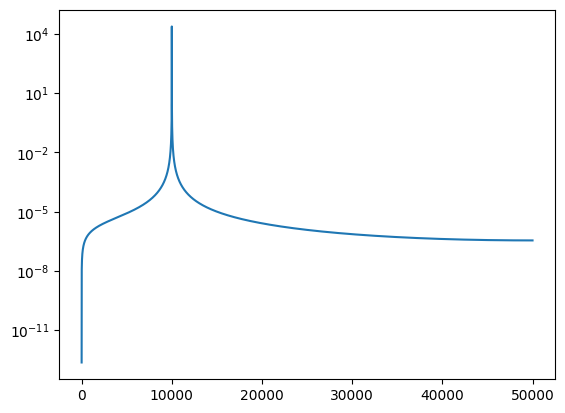

In [ ]:
XF = np.fft.rfft(X)
n = np.argmax(abs(XF))
V = XF[n]

print(n)
print(abs(V))
print(np.angle(V))

plt.semilogy(abs(XF))
plt.show()

Plotting the correlation and transform side to side allows us to see the difference between the two plots. In order to do this we can use the plt.subplot feature on matplotlib.

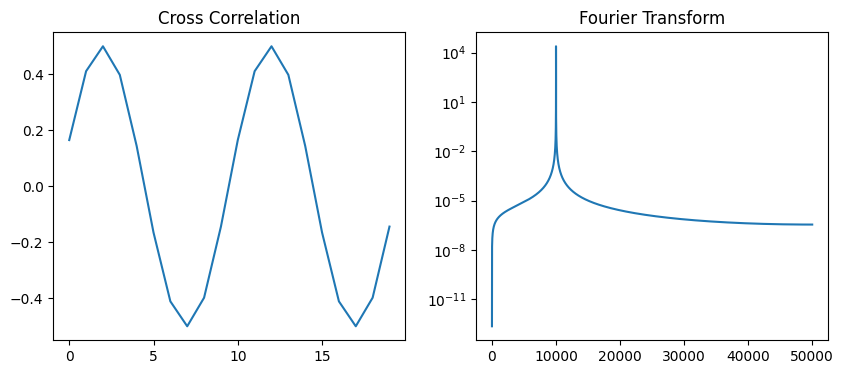

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1) # subplot will make a 2x1 grid of the plots where this plot will be the 1st plot of the first column of the first row
plt.plot(X[:20])
plt.title('Cross Correlation')

plt.subplot(1,2,2) # this plot will be the 1st plot of the first column of the first row
plt.semilogy(abs(XF))
plt.title('Fourier Transform')

plt.show()

# Visualization of the FX Correlator

np.fft.rfft will compute the 1D discrete Fourier Transform of an input array with real values. This is done using the Fast Fourier Transfrom (FFT) algorithm.

https://numpy.org/doc/stable/reference/routines.fft.html

Once again, when we pull out the peak we see that the lag and phase in visibility are the same.

10000
2418823605.3877215
-1.2345033298982624


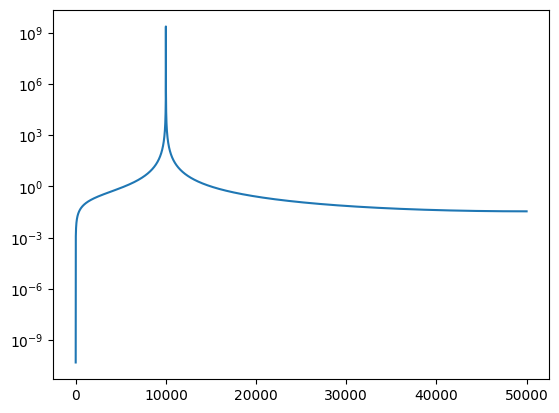

In [ ]:
S1 = np.fft.rfft(s1)
S2 = np.fft.rfft(s2)
FX = np.conj(S1) * S2
n = np.argmax(abs(FX))
V = FX[n]

print(n)
print(abs(V))
print(np.angle(V))

plt.semilogy(abs(FX))
plt.show()

Now we can apply the FX Correlator to the noise we introduced in an earlier section to reduce the noise floor and reveal the signal. This will tell us how much the measured phase deviates from the correct value relative to the total possible phase range, or the error in the phase as a percentage level which is just the ((Estimated Number – Actual Number)/ Actual number) x 100.

What would the function look like when we consider noise to compute the visibility spectrum using the FX Correlator?

10000
2405906737.406166
-1.241076129063532


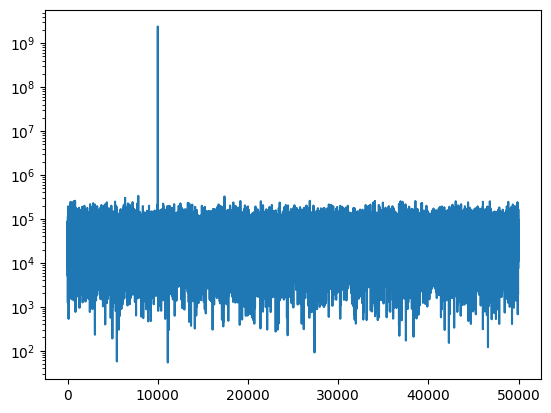

In [ ]:
S_1 = np.fft.rfft(s1 + n1)
S_2 = np.fft.rfft(s2 + n2)
FX = np.conj(S_1) * S_2
n = np.argmax(abs(FX))
V = FX[n]

print(n)
print(abs(V))
print(np.angle(V))

plt.semilogy(abs(FX))
plt.show()

# **Calibration**


We will reintroduce our noise and define our correlator in a function.

In [ ]:
n1 = np.random.normal(scale=1, size=100_000)
n2 = np.random.normal(scale=1, size=100_000)

def chunked_FX(s1, s2, n=1000):
    N  = int(ceil(len(s1) / n))
    S1 = np.fft.rfft(np.pad(s1+n1, (0, N*n-len(s1))).reshape(N, n))
    S2 = np.fft.rfft(np.pad(s2+n2, (0, N*n-len(s2))).reshape(N, n))
    return np.conj(S1) * S2

We will be defining $d(t)$ and $r(t)$ as our delay and delay rate and applying them to our signal so that we can see how they affect the visibility.

What do we notice when we change the index for both s1 and s2 in the same way?

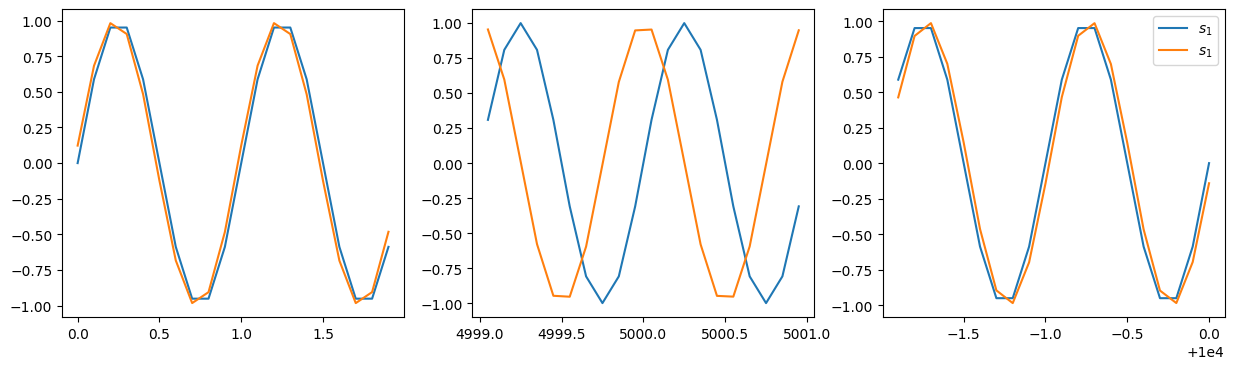

In [ ]:
d  = lambda t: 1e+3 * t/len(t) + 1
r  = lambda t: 1e-3 * t/len(t) + 1

s1 = np.sin(2 * pi * t)
s2 = np.sin(2 * pi * r(t) * (t + 0.123 / (2 * pi) * d(t)))
# s2 will be the signal that is affected by the delay and delay rate

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(t[:20], s1[:20])
plt.plot(t[:20], s2[:20])

plt.subplot(1,3,2)
plt.plot(t[50_000-10:50_000+10], s1[50_000-10:50_000+10])
plt.plot(t[50_000-10:50_000+10], s2[50_000-10:50_000+10])

plt.subplot(1,3,3)
plt.plot(t[-20:], s1[-20:], label=r'$s_1$')
plt.plot(t[-20:], s2[-20:], label=r'$s_1$')
plt.legend(loc='upper right')

plt.show()

## Viewing our data as a colormap image

We will start with correlating and finding the visiblity of the signals we have generated. Because our data is scalar the funtion plt.imshow will allow us to vizualize our data as a "spectral" line.

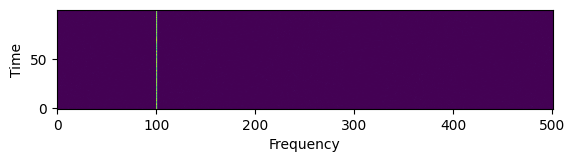

In [ ]:
FX = chunked_FX(s1, s2)

plt.imshow(abs(FX), origin='lower')
plt.xlabel('Frequency')
plt.ylabel('Time')
plt.show()

Vizualizing our data allowed us to identify the frequency we will be focusing on.

Another way to make subplots includes using the subplots() function in matplotlib.pyplot. Where fig represents the figure layout and ax returns the axes or subplot in your figure.

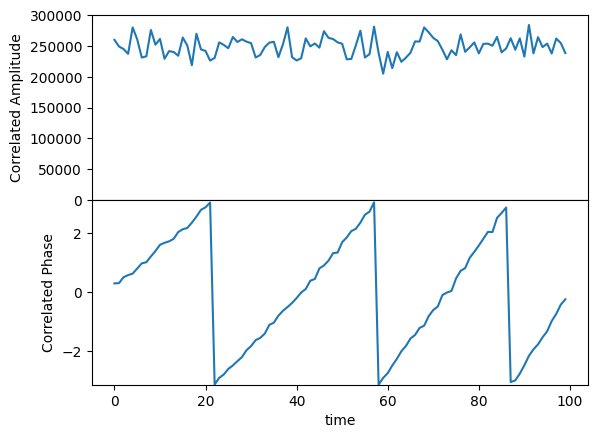

In [ ]:
vis = FX[:,100]
# [:,] represents list slicing where in our case the 100 represents the column we want to select and the : means we want to select all the rows in the array

fig, (ax0, ax1) = plt.subplots(2,1, sharex=True)
plt.subplots_adjust(hspace=0)

ax0.plot(abs(vis)) #abs() returns the absolute value of the visibility
ax0.set_ylabel('Correlated Amplitude')
ax0.set_ylim(0, 300_000)

ax1.plot(np.angle(vis)) # np.angle will return values of the visibility in the [-pi,pi] range
ax1.set_ylabel('Correlated Phase')
ax1.set_ylim(-pi, pi)
ax1.set_xlabel('time')

plt.show()

When looking at these phase plots a flat phase plot would indicate a constant time delay across all frequencies and a sloping phase plot indicates a varying time delay or a "phase drift".

In our case would you say our delay is contant or is there a varying time delay in our phase?



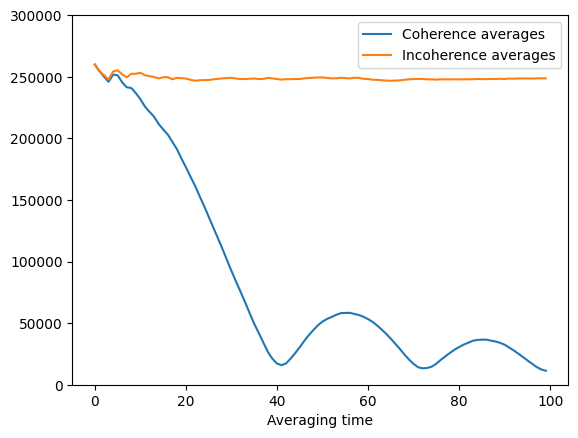

In [ ]:
coh_avgs   = [abs(np.mean(vis[:i])) for i in range(1, 100+1)]
incoh_avgs = [np.mean(abs(vis[:i])) for i in range(1, 100+1)]

plt.plot(coh_avgs,   label='Coherence averages')
plt.plot(incoh_avgs, label='Incoherence averages')
plt.ylim(0, 300_000)
plt.xlabel('Averaging time')
plt.legend()
plt.show()

# Fringe Fitting

Fringe fitting involves performing the Fourier transform on our visibility, derotating the phase in the visibility with the Rp value we obtain and removing the rate in our data.

0.03


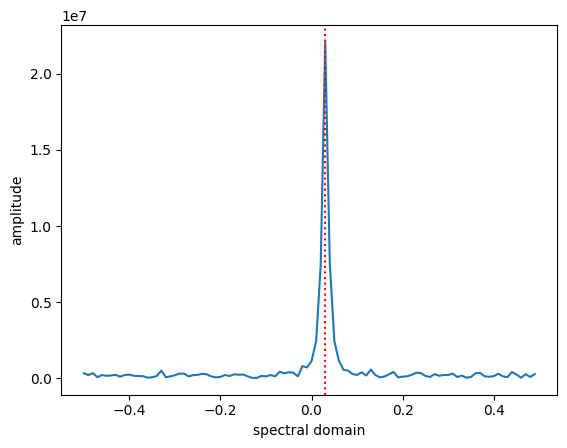

In [ ]:
Vis = np.fft.fftshift(np.fft.fft(vis))
R   = np.fft.fftshift(np.fft.fftfreq(100))
Rp  = R[np.argmax(abs(Vis))] # location of the peak in `Vis`

print(Rp)

plt.plot(R, abs(Vis))
plt.xlabel('spectral domain')
plt.ylabel('amplitude')
plt.axvline(Rp, color='r', linestyle=':')
plt.show()

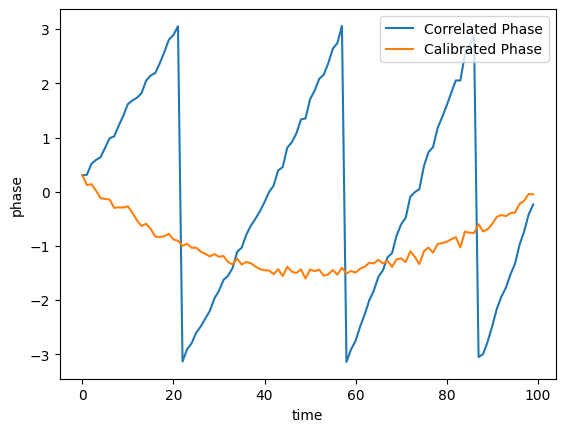

In [ ]:
viscal = vis * np.exp(-2j * pi * Rp * np.arange(len(vis)))
# viscal represents the derotated phase in the visibility

plt.plot(np.angle(vis),    label='Correlated Phase')
plt.plot(np.angle(viscal), label='Calibrated Phase')
plt.xlabel('time')
plt.ylabel('phase')
plt.legend()
plt.show()

With orange representing the *new* phase plot, is there still a large "phase drift"?

How would we perfrom the coherence averaging for the calibrated data compared with the correlated data?

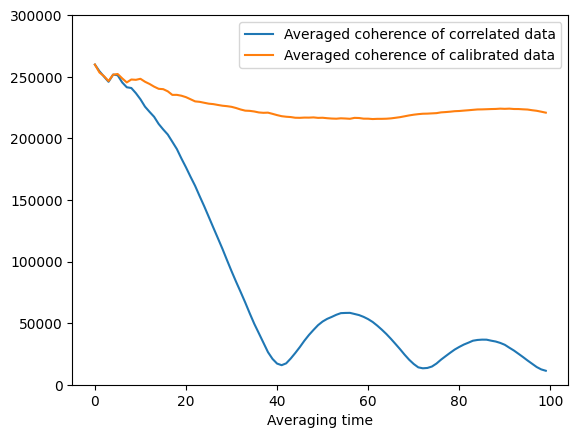

In [ ]:
vis_avgs    = [abs(np.mean(vis[:i]))    for i in range(1, 100+1)]
viscal_avgs = [abs(np.mean(viscal[:i])) for i in range(1, 100+1)]

plt.plot(vis_avgs,    label='Averaged coherence of correlated data')
plt.plot(viscal_avgs, label='Averaged coherence of calibrated data')
plt.ylim(0, 300_000)
plt.xlabel('Averaging time')
plt.legend()
plt.show()